## Binarizzazione di un'immagine usando l'algoritmo di Otsu

L'algoritmo di Otsu è un algoritmo che stima la soglia di binarizzazione in modo tale da rendere minima la varianza tra due classi (foreground e background dell'immagine). Per saperne di più clicca [qui](https://it.wikipedia.org/wiki/Metodo_Otsu).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('./Lena.png', 0)

otsu_thr, otsu_mask = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('il valore della soglia di Otsu è: ', otsu_thr)

il valore della soglia di Otsu è:  124.0


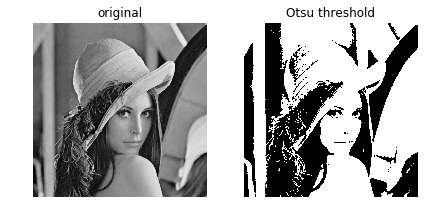

In [3]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Otsu threshold')
plt.imshow(otsu_mask, cmap='gray')

plt.tight_layout()
plt.show()

# TODO CONTORNI

## Componenti Connesse da un'immagine binaria

In [13]:
connectivity = 8
# ricaviamo l'immagine binaria come in precedenza

img = cv2.imread('./Lena.png', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

In [14]:
################### DA RIVEDERE##########

num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    if stats[1][4] > 200:
        colored[labelmap==1] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored, (int(centers[1][0]), int(centers[1][1])), 5, (255, 0, 0), cv2.FILLED)

img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)

cv2.imshow('con comp', np.hstack((img, colored)))
cv2.waitKey()
cv2.destroyAllWindows()